# Jak szczęśliwi są ludzie na swiecie? Analiza stopnia satysfakcji z życia na przestrzeni lat

>Przedmiotem niniejszego opracowania jest analiza szczęścia ludzi w poszczególnych krajach świata na przestrzeni lat 2015-2020. Analiza opiera się na danych pochodzących z raportu pn. "World Happiness Report".

>World Happiness Report jest badaniem stanu globalnego szczęścia. Klasyfikuje on kraje całego świata według tego, jak szczęślwi czują się ich obywatele. Raporty te opierają się na szerokiej gamie danych, gdzie najważniejszym źródłem jest badanie Gallup World Poll. Oceny życia z Gallup World Poll stanowią podstawę corocznych rankingów szczęścia, które zawsze budzą powszechne zainteresowanie.

>Niniejsza praca w całości wykorzystuje język programowania Python a wykonana została w edytorze kodu Jupyter Notebook.

>W pracy posłużono się 6 plikami csv dotyczącymi poziomu szczęścia w poszczególnych krajach na przestrzeni lat 2015-2020.



### Import niezbędnych bibliotek

>W pracy obejmującej importowanie, analizowanie,a  także przetwarzanie plików .csv w języku Python niezbędne jest zaimplemenetowanie biliotek umożliwiających działania na danych. 

>Niezbędną biblioteką wykorzystywaną przy realizacji niniejszej pracy była bilioteka pandas. Standardowymi operacjami wykonywanymi za jej pomocą  było wczytywanie danych, przegląd struktury tworzenie ramek danych (tzw. data frames), a także czyszczenie i modyfikowanie danych.

>GeoPandas jest biblioteką umożliwiającą obsługę danych geoprzestrzennych. Dzięki tej bibliotece możliwa jest praca z plikami odniesionymi przestrzennie bez potrzeby podłączania dodatkowych baz danych takich jak PostGIS. W niniejszym projekcie bibliotekę wykorzystano do przygotowania interaktywnynych map.

>Kolejną wykorzstaną w projekcie biblioteką jest Matplotlib. Służy ona do tworzenia różnego rodzaju wykresów. Bibliotekę  tę można importować na kilka sposobów. Oficjalna dokumentacja sugeruje jednak, aby w bardziej złożonych projektach stosować jawne importy tj. stosować
>- import numpy as np
>- import matplotlib.pyplot as plt

>Plotly jest biblioteką graficzną języka Python. Dzięki niej tworzyć można interaktywne wykresy o wysokiej jakości. 

>Seaborn to biblioteka do wizualizacji danych w języku Python oparta na Matplotlib. Dzięki niej możliwe jest rysowanie atrakcyjnych grafik statystycznych.

In [49]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot

import seaborn as sns

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import itables.options as opt
from itables import show


pd.options.mode.chained_assignment = None  # default='warn'

### Wczytywanie danych. Przetworzenie danych na taki sam format kolumn.

>Proces analizy danych rozpoczął się w momencie znalezienia właściwych źródeł danych oraz pobrania materiałów.
Natępnie dane zostały wgrane do Projektu za pomocą polecenia "pd.read_csv". Wgrywane pliki powinny znajdować się  tym samym forlderze co Projekt.
Kluczowe i niezbędne z punktu widzenia analizy danych jest właściwe przygotowanie danych do dalszych procesów.


>W ramach rozpoznawania danych przeprowadzono następujące procesy:
>- eksploracja danych
>- zmiana nazw kolumn tak, aby w każdej ramce danych zawierały kolumny o takich samych nazwach.
>- połączenie ze sobą dwóch zbiorów danych, w celu uzyskania informacji o regionie
>- normalizacja danych zawartych w poszczególnych kolumnach

>Pierwszym etapem było rozpoznanie zawartości pozyskanych danych oraz wyświetlenie podstawowych informacji o zaiportowanych danych, czyli eksploracja danych
 Posłużono się tutaj poleceniami 
*.info()
*.head(5)
Pierwsze polecenie dostarcza niezbędnych informacji na temat danych tj. informację o nazwie kolumny, ilości braku danych w kolumnach oraz o typie danych każdej z kolumn.
za pomocą polecenia head(5), wyświetlono 5 pierwszych wierszy z każdego zbioru danych, posortowanych według kolumny zawierającej miejsce w rankingu w danym roku.
Wyżej wymienione funkcje pozwalają na szybkie sprawdzenie jakości pozyskanych danych, bez konieczności wyświetlania całych tabel. Jest to wygodne w przypadku analizy wielu złożonych zbiorów danych.

>Kolejny etap obejmował usystematyzowanie nazw kolumn we wszystkich ramkach danych. Do tej operacji posłużyła funkcja .rename

>Nie każdy zbiór danych posiadał informację odnośnie regionu danego państwa. Informacja ta jest wartościowa ze względu na dalsze analizy. Za pomocą funkcji pd.merge połączono ze sobą zbiory tanych w taki sposób, aby w każdym z nich znajdowała się informacja o regionie.

>Niezbędną operacją podczas wstępnej obróbki danych jest również normalizacja wskaźników. Dzięki tej procedurze możliwe jest wzajemne porównywanie zbiorw danych i ich dalsza analiza. W opracowaniu skorzystano ze skalowania funkcji min-max. Podejście to (nazywane normalizacją) przeskalowuje cechę do sztywnego i szybkiego zakresu [0,1] poprzez odjęcie minimalnej wartości cechy, a następnie podzielenie jej przez zakres. W opracowaniu zastosowano skalowanie min-max za pomocą metod .min () i .max ().

# Nazwy kolumny przyjęte do anlizy oraz opis zawartości:

>Do analizy postanowiono przyjąć następujące dane:

>- Country - nazwa kraju
>- Year - rok, którego dotyczą dane
>- Region - nazwa regionu
>- Happiness Rank - miejsce w rankingu krajów na podstawie wyniku zadowolenia.
>- Happiness Score - wynik zadowolenia. Miara mierzona poprzez zadawanie badanym osobom pytania: „Jak oceniasz swoje szczęście w skali od 0 do 10, gdzie 10 określone jest jako najszczęśliwsze”.
>- Economy (GDP per Capita) - Produkt Krajowy Brutto w przeliczeniu na 1 mieszkańca. Zakres, w jakim PKB przyczynia się do obliczenia wskaźnika zadowolenia.
>- Family - rodzina. Stopień, w jakim Rodzina przyczynia się do obliczania wskaźnika zadowolenia
>- Health (Life Expectancy) - oczekiwana długość życia. Zakres, w jakim oczekiwana długość życia przyczyniła się do obliczenia wskaźnika zadowolenia
>- Freedom - wolnośc. Stopień, w jakim wolność przyczyniła się do obliczenia wskaźnika zadowolenia.
>- Trust (Government Corruption) - rządowa korupcja. Stopień, w jakim postrzeganie korupcji wpływa na wynik zadowolenia.
>- Generosity - hojnośc, szczodrość. Stopień, w jakim hojność przyczyniła się do obliczenia wyniku zadowolenia.

>Wszystkie operacje, takie jak, zmiana nazw kolumn czy normalizacja dotyczyły właśnie wyżej wymienionych kolumn.

In [50]:
#wczytywanie danych
data2015=pd.read_csv('./2015.csv')

#wyświetlanie informacji o danych
data2015.info()

#dodanie kolumny z rokiem, którego dotyczą dane
data2015['Year'] = 2015 

#normalizacja danych
column = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']
    
data2015[column] = (data2015[column] - data2015[column].min()) / (data2015[column].max() - data2015[column].min())    

#wyświetlanie  danych
data2015.sort_values(by=['Happiness Rank']).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,1.000000,0.03411,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,2.51738,2015
1,Iceland,Western Europe,2,0.994524,0.04884,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,2.70201,2015
2,Denmark,Western Europe,3,0.987363,0.03328,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,2.49204,2015
3,Norway,Western Europe,4,0.986310,0.03880,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,2.46531,2015
4,Canada,North America,5,0.966302,0.03553,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,2.45176,2015


In [51]:
#wczytywanie danych
data2016=pd.read_csv('./2016.csv')

#wyświetlanie informacji o danych
data2016.info()

#dodanie kolumny z rokiem, którego dotyczą dane
data2016['Year'] = 2016

#normalizacja danych
column = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']
    
data2016[column] = (data2016[column] - data2016[column].min()) / (data2016[column].max() - data2016[column].min())    

#wyświetlanie danych
data2016.sort_values(by=['Happiness Rank']).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,1.000000,7.460,7.592,0.790333,0.983503,0.834451,0.952225,0.879892,0.441266,2.73939,2016
1,Switzerland,Western Europe,2,0.996321,7.428,7.590,0.837228,0.967868,0.905811,0.962349,0.815562,0.342597,2.69463,2016
2,Iceland,Western Europe,3,0.994590,7.333,7.669,0.782044,1.000000,0.910325,0.930581,0.296411,0.581645,2.83137,2016
3,Norway,Western Europe,4,0.993941,7.421,7.575,0.864697,0.952369,0.835238,0.979638,0.708141,0.462298,2.66465,2016
4,Finland,Western Europe,5,0.975546,7.351,7.475,0.770708,0.958910,0.851108,0.938470,0.811623,0.310988,2.82596,2016


In [52]:
#wczytywanie danych
data2017=pd.read_csv('./2017.csv')

#wyświetlanie informacji o danych
data2017.info()

#dołączenie informacji o regionie na podstawie wcześniej zaimplementowanych danych
data2017 = pd.merge(data2016, data2017, how="inner", on="Country")


data2017=data2017[['Country','Region', 'Happiness.Rank','Happiness.Score',
                  'Economy..GDP.per.Capita.','Family_y','Health..Life.Expectancy.', 'Freedom_y',
                   'Generosity_y','Trust..Government.Corruption.','Dystopia.Residual']]  

#zmiana nazw kolumn
data2017 = data2017.rename(columns = {'Country' : 'Country','Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Family_y': 'Family', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Freedom_y':'Freedom','Generosity_y':'Generosity', 'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})          

#dodanie kolumny z rokiem, którego dotyczą dane
data2017['Year'] = 2017 

#normalizacja danych
column = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']
    
data2017[column] = (data2017[column] - data2017[column].min()) / (data2017[column].max() - data2017[column].min())    

#wyświetlanie danych  
data2017.sort_values(by=['Happiness Rank']).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
3,Norway,Western Europe,1,1.000000,0.862400,0.936556,0.838096,0.965323,0.431957,0.680505,2.277027,2017
0,Denmark,Western Europe,2,0.996762,0.789850,0.951047,0.833751,0.951019,0.423924,0.863156,2.313707,2017
2,Iceland,Western Europe,3,0.992876,0.788903,1.000000,0.877172,0.952775,0.567420,0.330657,2.322715,2017
1,Switzerland,Western Europe,4,0.990717,0.834542,0.922878,0.903212,0.942001,0.346686,0.790440,2.276716,2017
4,Finland,Western Europe,5,0.985319,0.768850,0.942092,0.851329,0.938780,0.292913,0.824047,2.430182,2017


In [53]:
#wczytywanie danych
data2018=pd.read_csv('./2018.csv')

#wyświetlanie informacji o danych
data2018.info()

#dołączenie informacji o regionie na podstawie wcześniej zaimplementowanych danych
data2018 = pd.merge(data2016, data2018, how="inner", left_on='Country', right_on='Country or region')
                    
data2018=data2018[['Country or region','Region','Overall rank', 'Score','GDP per capita','Social support', 'Healthy life expectancy',
                  'Freedom to make life choices','Generosity_y','Perceptions of corruption']]  

#zmiana nazw kolumn
data2018 = data2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Generosity_y':'Generosity','Perceptions of corruption' : 'Trust (Government Corruption)'})
#dodanie kolumny z rokiem, którego dotyczą dane
data2018['Year'] = 2018

column = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']
    
data2018[column] = (data2018[column] - data2018[column].min()) / (data2018[column].max() - data2018[column].min())    

#wyświetlanie danych  
data2018.sort_values(by=['Happiness Rank']).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
4,Finland,Western Europe,1,1.000000,0.622615,0.959119,0.848544,0.940608,0.337793,0.859956,2018
3,Norway,Western Europe,2,0.991961,0.694656,0.951258,0.835922,0.947514,0.478261,0.743982,2018
0,Denmark,Western Europe,3,0.983711,0.644561,0.957547,0.842718,0.943370,0.474916,0.892779,2018
2,Iceland,Western Europe,4,0.971018,0.640744,1.000000,0.887379,0.935083,0.590301,0.301969,2018
1,Switzerland,Western Europe,5,0.969325,0.677481,0.925314,0.900000,0.911602,0.428094,0.781182,2018


In [54]:
#wczytywanie danych
data2019=pd.read_csv('./2019.csv')

#wyświetlanie informacji o danych
data2019.info()

#dołączenie informacji o regionie na podstawie wcześniej zaimplementowanych danych
data2019 = pd.merge(data2016, data2019, how="inner", left_on='Country', right_on='Country or region')

data2019=data2019[['Country or region','Region','Overall rank', 'Score','GDP per capita','Social support', 'Healthy life expectancy',
                  'Freedom to make life choices','Generosity_y','Perceptions of corruption']]  

#zmiana nazw kolumn
data2019 = data2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Generosity_y':'Generosity','Perceptions of corruption' : 'Trust (Government Corruption)'})

#dodanie kolumny z rokiem, którego dotyczą dane
data2019['Year'] = 2019 

#normalizacja danych
column = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']
    
data2019[column] = (data2019[column] - data2019[column].min()) / (data2019[column].max() - data2019[column].min())    

#wyświetlanie danych  
data2019.sort_values(by=['Happiness Rank']).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
4,Finland,Western Europe,1,1.000000,0.795724,0.970305,0.836670,0.944532,0.270318,0.867550,2019
0,Denmark,Western Europe,2,0.965622,0.821259,0.959069,0.847208,0.938193,0.445230,0.905077,2019
3,Norway,Western Europe,3,0.956265,0.883610,0.966292,0.880927,0.955626,0.478799,0.752759,2019
2,Iceland,Western Europe,4,0.944060,0.819477,1.000000,0.878820,0.936609,0.625442,0.260486,2019
6,Netherlands,Western Europe,5,0.942840,0.828979,0.918138,0.850369,0.882726,0.568905,0.657837,2019


In [55]:
#wczytywanie danych
data2020=pd.read_csv('./2020.csv')

#wyświetlanie informacji o danych
data2020.info()

#preliczenie i dołączenie danych dotyczących wskaźnika szczęscia w roku 2020 na podstawie kolumny "Happiness Score"
data2020['Happiness Rank'] =  range(1, len(data2020.index)+1)

#zmiana nazw kolumn
data2020 = data2020.rename(columns = {'Country name' : 'Country','Regional indicator':'Region', 'Happiness Rank': 'Happiness Rank', 'Ladder score' : 'Happiness Score', 
                                      'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'})

#dodanie kolumny z rokiem, którego dotyczą dane
data2020['Year'] = 2020 


#normalizacja danych
column = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']
    
data2020[column] = (data2020[column] - data2020[column].min()) / (data2020[column].max() - data2020[column].min())    
  
#wyświetlanie danych    
data2020.sort_values(by=['Happiness Rank']).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

,Country,Region,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Year
0,Finland,Western Europe,1.000000,0.031156,7.869766,7.747634,0.836344,0.968957,0.844840,0.955351,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1,2020
1,Denmark,Western Europe,0.968885,0.033492,7.711245,7.579955,0.863519,0.971492,0.860714,0.959279,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2,2020
2,Switzerland,Western Europe,0.952535,0.035014,7.628528,7.491272,0.905054,0.951431,0.914502,0.907228,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3,2020
3,Iceland,Western Europe,0.941966,0.059616,7.621347,7.387653,0.863228,1.000000,0.879619,0.954867,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4,2020
4,Norway,Western Europe,0.938819,0.034837,7.556281,7.419719,0.926810,0.966144,0.885972,0.966724,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5,2020


### Zebranie danych do jednej ramki danych

>Efektem procesu przeszktałcania danych jest jeden ustrukturyzowany zbiór danych dotyczący zadowolenia z życia mieszkańców poszczególnych krajów na przestrzeni lat 2015-2020. Tak zebrane dane wykorzystane zostaną do stworzenia map oraz wskaźnika korelacji.


In [56]:
ranking = pd.DataFrame(columns = ['Country', 'Year', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity'])

n = [data2015, data2016, data2017, data2018, data2019, data2020]

for i in n:
    ranking = ranking.append(i[['Region','Country', 'Year','Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity']], ignore_index = 'True')
    ranking = ranking.round(decimals=2)

#dodanie możliwości wyświetlania określonej ilości wierszy.
#opt.lengthMenu = [5, 10, 20, 50, 100, 200, 500]
#opt.maxBytes = 2**20

ranking.info()
ranking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        917 non-null    object 
 1   Year                           917 non-null    object 
 2   Happiness Rank                 917 non-null    object 
 3   Happiness Score                917 non-null    float64
 4   Economy (GDP per Capita)       917 non-null    float64
 5   Family                         917 non-null    float64
 6   Health (Life Expectancy)       917 non-null    float64
 7   Freedom                        917 non-null    float64
 8   Trust (Government Corruption)  916 non-null    float64
 9   Generosity                     917 non-null    float64
 10  Region                         917 non-null    object 
dtypes: float64(7), object(4)
memory usage: 78.9+ KB


,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region
0,Switzerland,2015,1,1.00,0.83,0.96,0.92,0.99,0.76,0.37,Western Europe
1,Iceland,2015,2,0.99,0.77,1.00,0.92,0.94,0.26,0.55,Western Europe
2,Denmark,2015,3,0.99,0.78,0.97,0.85,0.97,0.88,0.43,Western Europe
3,Norway,2015,4,0.99,0.86,0.95,0.86,1.00,0.66,0.44,Western Europe
4,Canada,2015,5,0.97,0.78,0.94,0.88,0.95,0.60,0.58,North America
...,...,...,...,...,...,...,...,...,...,...,...
912,Central African Republic,2020,149,0.17,0.03,0.00,0.00,0.42,0.95,0.44,Sub-Saharan Africa
913,Rwanda,2020,150,0.14,0.22,0.34,0.50,0.87,0.09,0.41,Sub-Saharan Africa
914,Zimbabwe,2020,151,0.14,0.28,0.68,0.33,0.54,0.85,0.27,Sub-Saharan Africa
915,South Sudan,2020,152,0.05,0.19,0.36,0.18,0.09,0.79,0.37,Sub-Saharan Africa


### Wizualizacja danych na mapie


>We współczesnej kartografii dostrzec można zmianę w sposobach tworzenia i użytkowania map. Język programowania Python wspiera możliwość geowizualizacji danych. Redagowane w ten sposób dane pozwalają w sposób atrakcyjny, skuteczny i użyteczny wizualizować interesujące nas informacje.

>Za pomocą poniższego kodu połączono dane zawarte w plikach .csv z danymi geoprzestrzennymi. Dzięki tej operacji dane w tabeli przybrały postać interaktywnej mapy. Wizualizacja pozwala na zmienianie danych z poszczególnych lat za pomocą suwaka. Dodatkowo po najechaniu na jakikolwiek kraj wyświetlane są podstawowe informacje zawarte w wyżej przedstawionych tabelach.

### Ranking satysfakcji z życia w latach 2015-2020

In [57]:
#tworzenie "suwaka" z latami
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #transformacja danych w dane typy string
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)
    
    
    ranking1['text'] = 'Region: ' + ranking1['Region']+ '<br>' + \
    'Happiness Score: ' + ranking1['Happiness Score']+ '<br>' + \
    'Economy (GDP per Capita): ' + ranking1['Economy (GDP per Capita)']+ '<br>' + \
    'Family: ' + ranking1['Family']+ '<br>' + \
    'Health (Life Expectancy): ' + ranking1['Health (Life Expectancy)']+ '<br>' + \
    'Freedom: ' + ranking1['Freedom']+ '<br>' + \
    'Trust (Government Corruption): ' + ranking1['Trust (Government Corruption)']+ '<br>' + \
    'Generosity: ' + ranking1['Generosity']
    
    
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Happiness Rank'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'], 
           marker = dict(    
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Miejsce w rankingu',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#tworzenie kroków dla "suwaka" z latami
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #tworzenie etykiet dla "suwaka"
                label='Rok {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Ranking satysfakcji z życia',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

#wyświetlanie mapy
plotly.offline.iplot(fig)

# Ekonomia (Produkt Krajowy Brutto w przeliczeniu na 1 mieszkańca)

In [58]:
#tworzenie "suwaka" z latami
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #transformacja danych w dane typy string
    for col in ranking1.columns: 
        ranking1[col] = ranking1[col].astype(str)
    
    ranking1['text'] = 'Region: ' + ranking1['Region']
     
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Economy (GDP per Capita)'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict(
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Wskaźnik',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#tworzenie kroków dla "suwaka" z latami
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #tworzenie etykiet dla "suwaka"
                label='Rok {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Ekonomia (Produkt Krajowy Brutto w przeliczeniu na 1 mieszkańca)',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

#tworzenie kroków dla "suwaka" z latami
plotly.offline.iplot(fig)

# Wolność

In [59]:
#tworzenie "suwaka" z latami
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #transformacja danych w dane typy string
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)

    ranking1['text'] = 'Region: ' + ranking1['Region']
       
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Freedom'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict( 
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Wskaźnik',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#tworzenie kroków dla "suwaka" z latami
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #tworzenie etykiet dla "suwaka"
                label='Rok {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Wolność',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
             sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

#tworzenie kroków dla "suwaka" z latami
plotly.offline.iplot(fig)

# Zaufanie (rządowa korupcja)

In [60]:
#tworzenie "suwaka" z latami
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #transformacja danych w dane typy string
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)

    ranking1['text'] = 'Region: ' + ranking1['Region']
        
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Trust (Government Corruption)'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict( 
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Wskaźnik',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#tworzenie kroków dla "suwaka" z latami
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #tworzenie etykiet dla "suwaka"
                label='Rok {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Zaufanie (rządowa korupcja)',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
             sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

#tworzenie kroków dla "suwaka" z latami
plotly.offline.iplot(fig)

# Zdrowie (oczekiwana długość życia)

In [61]:
#tworzenie "suwaka" z latami
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #transformacja danych w dane typy string
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)
        
    ranking1['text'] = 'Region: ' + ranking1['Region']   
        
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Health (Life Expectancy)'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict(     # for the lines separating states
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Wskaźnik',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#tworzenie kroków dla "suwaka" z latami
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #tworzenie etykiet dla "suwaka"
                label='Rok {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Zdrowie (oczekiwana długość życia)',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
             sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

#tworzenie kroków dla "suwaka" z latami
plotly.offline.iplot(fig)

### Rozpoznanie zależności między wskaźnikami

>Sposobem na sprawdzenie zależnoścu między kolumnami w zbiorze danych jest wizualizacja macierzy korelacji jako tzw. heatmapy (tj. mapy ciepła). Analizując wybrane wskaźniki, badany jest poziom ich wzajemnego skorelowania. Do wyznaczenia współczynnika korelacji i przygotowania mapy ciepła posłużono się metodą corr. Określa ona współczynnik korelacji na nakładających się, wyrównanych za pomocą indeksu wartościach umieszczonych ramce danych. W efekcie uzyskano ramkę danych, którą należy interpretować tak, że im wyższe wartości, tym zależność większa. Korelacja zmiennej (kolumny) samej ze sobą przybiera wartość 1,0. Z tego powodu wszystkie wartości po przekątnej wynoszą 1,0.

In [62]:
#opt.lengthMenu = [7]
ranking.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.773764,0.745994,0.762586,0.569307,0.240518,0.130942
Economy (GDP per Capita),0.773764,1.000000,0.682144,0.818083,0.369098,0.217233,-0.037105
Family,0.745994,0.682144,1.000000,0.639976,0.448447,0.192590,0.038093
Health (Life Expectancy),0.762586,0.818083,0.639976,1.000000,0.378454,0.158489,0.022875
Freedom,0.569307,0.369098,0.448447,0.378454,1.000000,0.307731,0.314447
Trust (Government Corruption),0.240518,0.217233,0.192590,0.158489,0.307731,1.000000,0.199303
Generosity,0.130942,-0.037105,0.038093,0.022875,0.314447,0.199303,1.000000


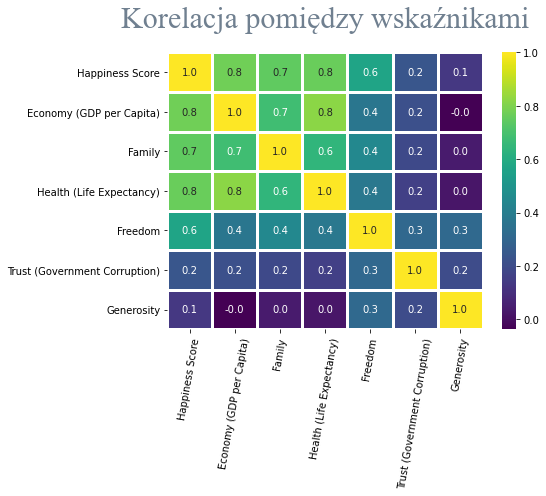

In [63]:
#stworzenie heatmapy korelacji
y,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(ranking.corr(),annot=True, linewidths=2.50, fmt= '.1f',ax=ax, cmap="viridis")
plt.xticks(rotation=80) 
ax.set_title("Korelacja pomiędzy wskaźnikami",font="Times New Roman", fontsize=30, color ='slategray', pad=25)

#wyświetlenie heatmapy korelacji
y.tight_layout()
plt.show()

Największe zależności występują pomiędzy wskaźnikiem zadowolenia, a Produktem Krajowym Brutto w przeliczeniu na jednego mieszkańca oraz oczekiwaną długością życia. Najmniejsze zależności występują między wskaźnikiem zadowolenia a hojnością.

# Zmiana poziomu szczęścia dla top 10 krajów


In [78]:
df2015 = data2015.iloc[:10,:]
df2016 = data2016.iloc[:10,:]
df2017 = data2017.iloc[:10,:]
df2018 = data2018.iloc[:10,:]
df2019 = data2019.iloc[:10,:]
df2020 = data2020.iloc[:10,:]

In [79]:
trace1 =go.Scatter(
                    x = df2015['Country'],
                    y = df2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color ="#481567"),
                    text= df2015.Country)
trace1
# creating trace2
trace2 =go.Scatter(
                    x = df2015['Country'],
                    y = df2016['Happiness Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "#33638D"),
                    text= df2016.Country)
# creating trace3
trace3 =go.Scatter(
                    x = df2015['Country'],
                    y = df2017['Happiness Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = '#238A8D'),
                    text= df2017.Country)

# creating trace4
trace4 =go.Scatter(
                    x = df2015['Country'],
                    y = df2018['Happiness Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = '#29AF7F'),
                    text= df2017.Country)

# creating trace5
trace5 =go.Scatter(
                    x = df2015['Country'],
                    y = df2019['Happiness Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = '#B8DE29'),
                    text= df2017.Country)

trace6 =go.Scatter(
                    x = df2015['Country'],
                    y = df2020['Happiness Score'],
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = '#FDE725'),
                    text= df2017.Country)

data = [trace1, trace2, trace3, trace4, trace5,trace6]
layout = dict(title = 'Happiness Rate Changing 2015 to 2020 for Top 10 Countries',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)


# Porównanie wartości PKB, Wolności, Korupcji rządowej, Oczekiwanej długości życia w top 10 państw w roku 2015

In [80]:
trace1 = go.Scatter(x = df2015['Country'],
                    y = df2015['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = '#481567'),
                    text= df2015.Country)

trace2 = go.Scatter(x = df2015['Country'],
                    y = df2015['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2015.Country)

trace3 = go.Scatter(x = df2015['Country'],
                    y = df2015['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = '#238A8D'),
                    text= df2015.Country)
 
trace4 = go.Scatter(x = df2015['Country'],
                    y = df2015['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2015.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Health- Porównanie dla 10 najszczęśliwszych państw w 2015 roku',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

# Porównanie wartości PKB, Wolności, Korupcji rządowej, Oczekiwanej długości życia w top 10 państw w roku 2016

In [81]:
trace1 = go.Scatter(x = df2016['Country'],
                    y = df2016['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = '#481567'),
                    text= df2016.Country)

trace2 = go.Scatter(x = df2016['Country'],
                    y = df2016['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2016.Country)

trace3 = go.Scatter(x = df2016['Country'],
                    y = df2016['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = '#238A8D'),
                    text= df2016.Country)

trace4 = go.Scatter(x = df2016['Country'],
                    y = df2016['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2016.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Health Porównanie dla 10 najszczęśliwszych państw w 2016 roku',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

# Porównanie wartości PKB, Wolności, Korupcji rządowej, Oczekiwanej długości życia w top 10 państw w roku 2017

In [82]:
trace1 = go.Scatter(x = df2017['Country'],
                    y = df2017['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = '#481567'),
                    text= df2017.Country)

trace2 = go.Scatter(x = df2017['Country'],
                    y = df2017['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2017.Country)

trace3 = go.Scatter(x = df2017['Country'],
                    y = df2017['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = '#238A8D'),
                    text= df2017.Country)

trace4 = go.Scatter(x = df2017['Country'],
                    y = df2017['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2017.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Health Porównanie dla 10 najszczęśliwszych państw w 2017 roku',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

# Porównanie wartości PKB, Wolności, Korupcji rządowej, Oczekiwanej długości życia w top 10 państw w roku 2018

In [83]:
trace1 = go.Scatter(x = df2018['Country'],
                    y = df2018['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = '#481567'),
                    text= df2018.Country)

trace2 = go.Scatter(x = df2018['Country'],
                    y = df2018['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2018.Country)

trace3 = go.Scatter(x = df2018['Country'],
                    y = df2018['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = '#238A8D'),
                    text= df2018.Country)

trace4 = go.Scatter(x = df2018['Country'],
                    y = df2018['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2018.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Health Porównanie dla 10 najszczęśliwszych państw w 2018 roku',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

# Porównanie wartości PKB, Wolności, Korupcji rządowej, Oczekiwanej długości życia w top 10 państw w roku 2019

In [84]:
trace1 = go.Scatter(x = df2019['Country'],
                    y = df2019['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = '#481567'),
                    text= df2019.Country)

trace2 = go.Scatter(x = df2019['Country'],
                    y = df2019['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2019.Country)

trace3 = go.Scatter(x = df2019['Country'],
                    y = df2019['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = '#238A8D'),
                    text= df2019.Country)

trace4 = go.Scatter(x = df2019['Country'],
                    y = df2019['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2019.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Health Porównanie dla 10 najszczęśliwszych państw w 2019 roku',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

# Porównanie wartości PKB, Wolności, Korupcji rządowej, Oczekiwanej długości życia w top 10 państw w roku 2020

In [85]:
trace1 = go.Scatter(x = df2020['Country'],
                    y = df2020['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = '#481567'),
                    text= df2019.Country)

trace2 = go.Scatter(x = df2020['Country'],
                    y = df2020['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2019.Country)

trace3 = go.Scatter(x = df2020['Country'],
                    y = df2020['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = '#238A8D'),
                    text= df2020.Country)

trace4 = go.Scatter(x = df2020['Country'],
                    y = df2020['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2020.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Economy - Freedom - Trust - Health Porównanie dla 10 najszczęśliwszych państw w 2019 roku',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

# Liczba krajów według regionu w 2015 

In [86]:
trace = go.Bar( x = data2015['Region'],
                y = data2015['Country'].value_counts(),
                marker = dict(color = '#33638D',
                line=dict(color='black',width=1.5)),
                text = data2015.Country,
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2015',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Liczba krajów według regionu w 2016

In [73]:
trace = go.Bar( x = data2016['Region'],
                y = data2016['Country'].value_counts(),
                marker = dict(color = '#33638D',
                line=dict(color='black',width=1.5)),
                text = data2016.Country,
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2016',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Liczba krajów według regionu w 2017

In [74]:
trace = go.Bar( x = data2017['Region'],
                y = data2017['Country'].value_counts(),
                marker = dict(color = '#33638D',
                line=dict(color='black',width=1.5)),
                text = data2017.Country,
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2017',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Liczba krajów według regionu w 2018

In [75]:
trace = go.Bar( x = data2018['Region'],
                y = data2018['Country'].value_counts(),
                marker = dict(color = '#33638D',
                line=dict(color='black',width=1.5)),
                text = data2018.Country,
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2018',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Liczba krajów według regionu w 2019

In [87]:
trace = go.Bar( x = data2019['Region'],
                y = data2019['Country'].value_counts(),
                marker = dict(color = '#33638D',
                line=dict(color='black',width=1.5)),
                text = data2019.Country,
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2019',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Liczba krajów według regionu w 2020

In [77]:
trace = go.Bar( x = data2020['Region'],
                y = data2020['Country'].value_counts(),
                marker = dict(color = '#33638D',
                line=dict(color='black',width=1.5)),
                text = data2020.Country,
                textposition='inside')

data = [trace]
layout = go.Layout(barmode = "group",
              title = 'Counts of Countries according to their Region - 2020',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Counts',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Wnioski

>Niezbędnym elementem analizy danych jest ich właściwe zaimplementowanie oraz wyciągnięcie podstawowych statystyk na ich temat. Zebranie wszystkich możliwych informacji dotyczących pozyskanych danych daje możliwość dalszej rztelnej i kompleksowej analizy. Dzięki normalizacji danych możliwe jest realistyczne odzwierciedlenie zależności pomiędzy wskaźnikami.

>Bardzo ważnym elementem jest również właściwa wizualizacja danych. Użyte w opracowaniu interatywne mapy pozwalają na przestrzenne zobrazowanie rzeczywistości. Wykorzystane interaktywne wykresy dają możliwość bardziej szczegółowemu przyjrzenia się występującym zależnościom.

>Wszystkie użyte metody wizualizacji danych pozwalają każdemu na szybkie przejrzenie wykorzystanych danych oraz pozwalają wyciągać instynktowne wnioski.


# Literatura
>- Węgrzyn, Tomasz. "Analiza korelacji pomiędzy wybranymi wskaźnikami finansowymi na przykładzie spółek publicznych." Studia Ekonomiczne 207 (2014): 255-268.
>- https://worldhappiness.report/archive/
>- https://www.pure.ed.ac.uk/ws/files/25070478/paper_94.pdf%5D